In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Simplilearn_Assignments/DL/loan_data.csv')
data.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
data['credit.policy'].value_counts()   #IMBALANCE CLASS PROBLEM

1    7710
0    1868
Name: credit.policy, dtype: int64

In [5]:
data = pd.get_dummies(data, columns = ['purpose'])
data.head(5)
x = data.loc[:,data.columns!="credit.policy"]
y = data.loc[:,data.columns=="credit.policy"]

In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.243370,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.429139,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


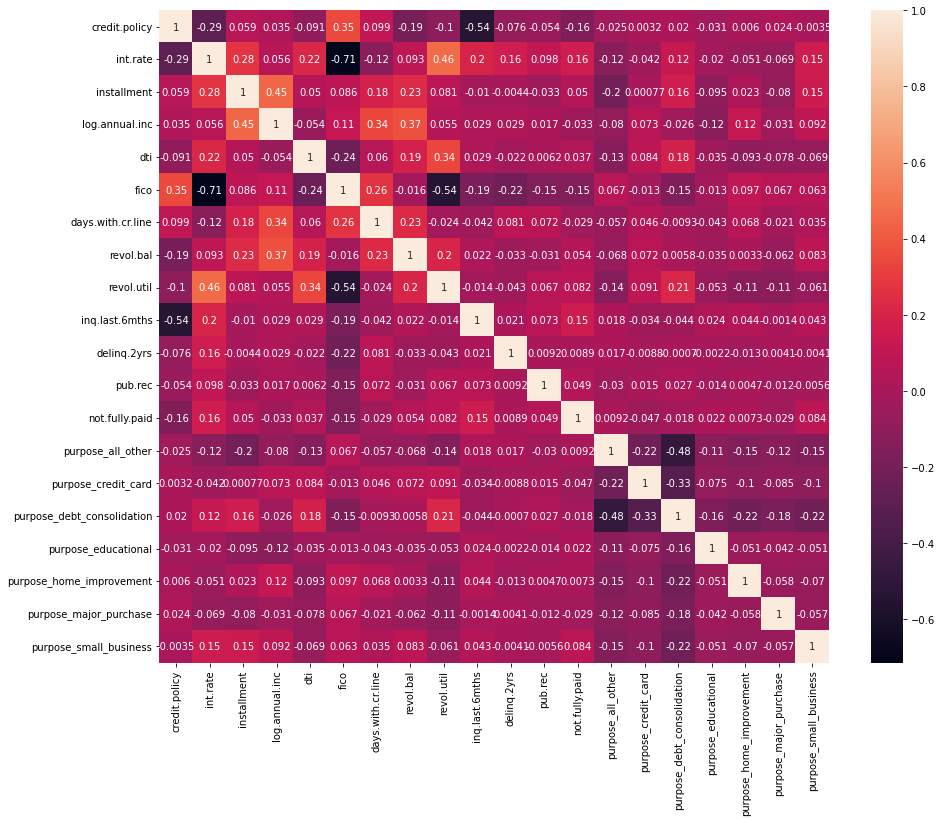

In [8]:
import seaborn as sns
plt.figure(figsize = (15,12))
sns.heatmap(data = data.corr(), annot = True)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)
xtrain, xval, ytrain, yval = train_test_split(xtrain,ytrain,test_size=0.25,stratify=ytrain,random_state=42)
std_scale = StandardScaler().fit(xtrain)
 
x_train_std = std_scale.transform(xtrain)
x_test_std = std_scale.transform(xtest)
x_val_std = std_scale.transform(xval)

oversample = SMOTE(sampling_strategy=0.75)
under = RandomUnderSampler(sampling_strategy=0.75)

x_train_over , y_train_over = oversample.fit_resample(x_train_std, ytrain)
x_val_over , y_val_over = oversample.fit_resample(x_val_std, yval)
x_test_over , y_test_over = oversample.fit_resample(x_test_std, ytest)

x_train_under , y_train_under = under.fit_resample(x_train_over, y_train_over)
x_val_under , y_val_under = under.fit_resample(x_val_over, y_val_over)
x_test_under , y_test_under = under.fit_resample(x_test_over, y_test_over)

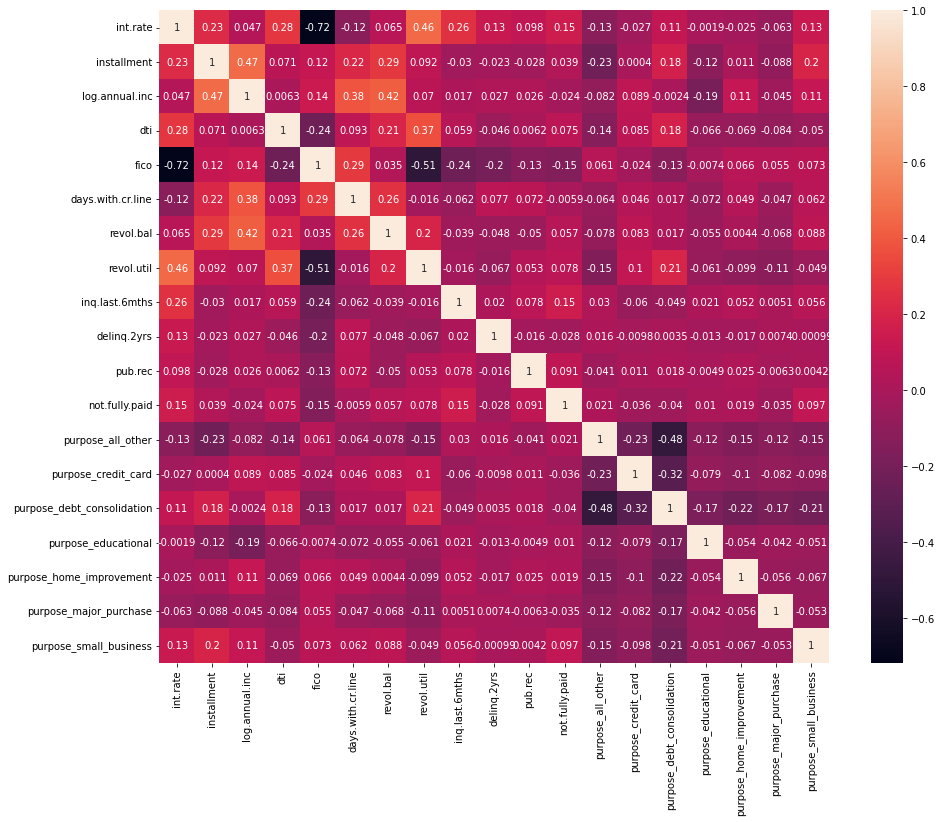

In [10]:
plt.figure(figsize = (15,12))
x_train_df = pd.DataFrame(x_train_under, columns=x.columns)
sns.heatmap(data = x_train_df.corr(), annot=True)
plt.show()

In [11]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(units = 128, activation = 'relu', input_shape = (x_train_under.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 64, activation = 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 32, activation = 'relu'))          
model.add(BatchNormalization())
model.add(Dropout(0.2, seed = 123))

model.add(Dense(units = 1, activation = 'sigmoid'))

es = EarlyStopping(monitor = "accuracy", patience = 4)
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [12]:
result = model.fit(x_train_under, y_train_under, validation_data = (x_val_under, y_val_under), callbacks = [es], epochs = 100)

Epoch 1/100
238/238 [==============================] - 4s 8ms/step - loss: 0.3564 - accuracy: 0.8459 - val_loss: 0.3060 - val_accuracy: 0.8664
Epoch 2/100
238/238 [==============================] - 2s 7ms/step - loss: 0.3029 - accuracy: 0.8678 - val_loss: 0.3045 - val_accuracy: 0.8695
Epoch 3/100
238/238 [==============================] - 2s 6ms/step - loss: 0.2735 - accuracy: 0.8840 - val_loss: 0.2322 - val_accuracy: 0.9059
Epoch 4/100
238/238 [==============================] - 2s 7ms/step - loss: 0.2574 - accuracy: 0.8921 - val_loss: 0.2354 - val_accuracy: 0.9000
Epoch 5/100
238/238 [==============================] - 2s 8ms/step - loss: 0.2528 - accuracy: 0.8922 - val_loss: 0.2407 - val_accuracy: 0.9015
Epoch 6/100
238/238 [==============================] - 2s 7ms/step - loss: 0.2407 - accuracy: 0.8988 - val_loss: 0.2342 - val_accuracy: 0.9083
Epoch 7/100
238/238 [==============================] - 2s 7ms/step - loss: 0.2393 - accuracy: 0.9027 - val_loss: 0.2483 - val_accuracy: 0.8932

In [13]:
test_result = model.fit(x_train_under, y_train_under, validation_data = (x_test_under, y_test_under), callbacks = [es], epochs = 100)

Epoch 1/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9241 - val_loss: 0.1454 - val_accuracy: 0.9478
Epoch 2/100
238/238 [==============================] - 1s 3ms/step - loss: 0.2000 - accuracy: 0.9203 - val_loss: 0.1560 - val_accuracy: 0.9425
Epoch 3/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1894 - accuracy: 0.9284 - val_loss: 0.1472 - val_accuracy: 0.9446
Epoch 4/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1916 - accuracy: 0.9255 - val_loss: 0.1492 - val_accuracy: 0.9425
Epoch 5/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1863 - accuracy: 0.9276 - val_loss: 0.1423 - val_accuracy: 0.9461
Epoch 6/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1885 - accuracy: 0.9258 - val_loss: 0.1480 - val_accuracy: 0.9464
Epoch 7/100
238/238 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.9271 - val_loss: 0.1537 - val_accuracy: 0.9386